In [2]:
#matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

We have 2 labelled images and 1 unlabelled image. We want to check how to improve previous results (while we don't have well-established quality metrics and estimate visually).

# Different architectures

## Original 3-class classification

First, we train separately on first and second image. We use 3-class classification (fault, fault lookalike, non-fault). For training we sequentially sample patches with 1/3 probabilities

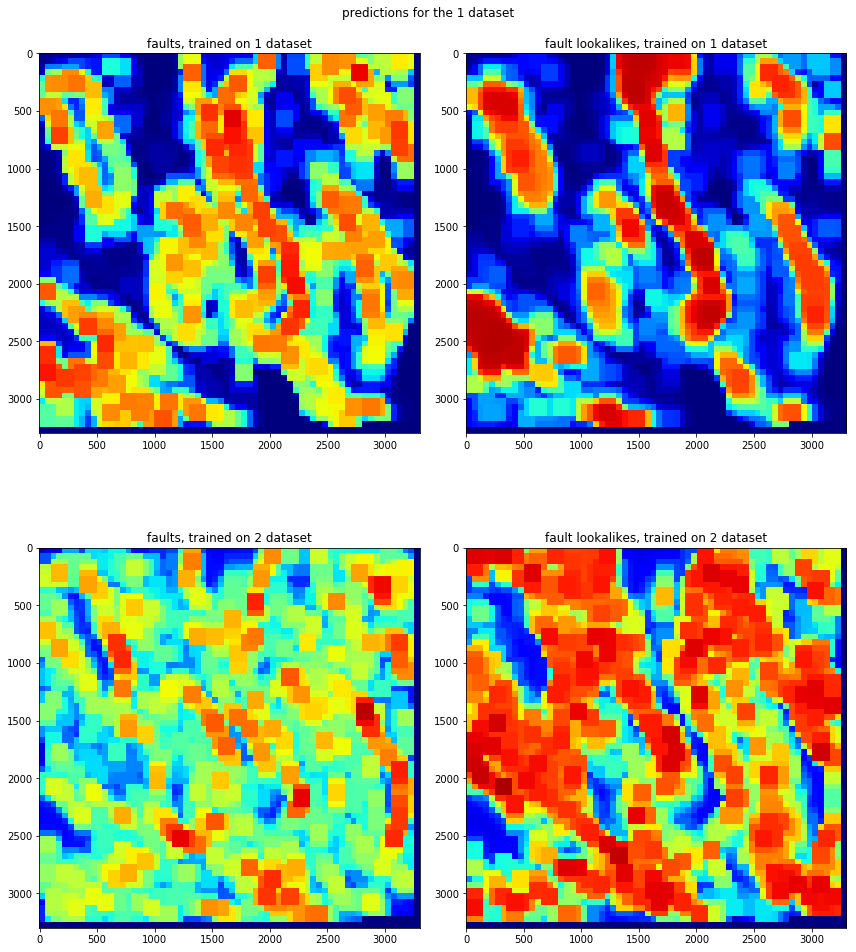

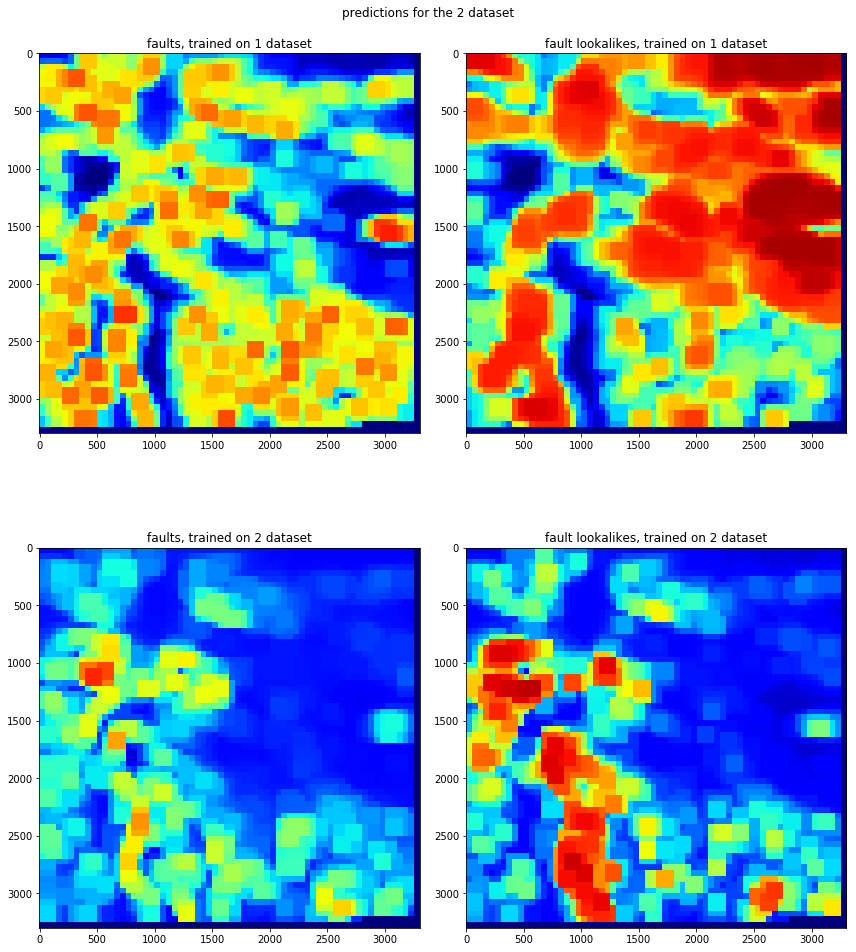

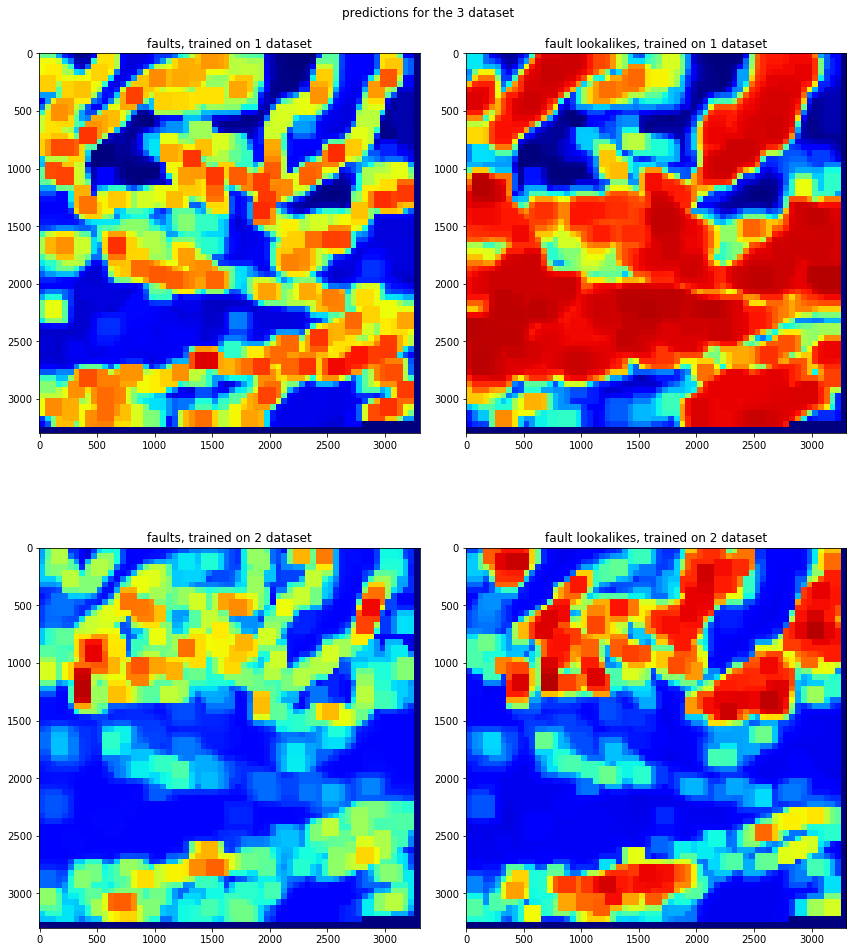

In [32]:
for i in range(3):
    f, ax = plt.subplots(2, 2, figsize=(12, 14))
    f.suptitle("predictions for the {} dataset".format(i+1))
    for j in range(2):
        ax[j, 0].imshow(Image.open("scripts/predictions_for_train_dataset_{}/heatmaps_3class_faults_{}.tif".format(j+1, i)))
        ax[j, 0].set_title("faults, trained on {} dataset".format(j+1))
        ax[j, 1].imshow(Image.open("scripts/predictions_for_train_dataset_{}/heatmaps_3class_lookalikes_{}.tif".format(j+1, i)))
        ax[j, 1].set_title("fault lookalikes, trained on {} dataset".format(j+1))
    plt.tight_layout()

It can be noticed that lookalikes from training on the first dataset are similar to normal predictions from training on the second dataset and vice versa. There is no clear indication in the labels why this happens. We can make a guess that for using both datasets for training we need to merge fault lookalike and normal classes together. 

## Classification with lookalikes and normal features as one class

Now for training we sample fault patch with probability 1/2, loolalike patch with probability 1/4 or normal patch with probability 1/4 and treat lookalike and normal patches as examples with same label

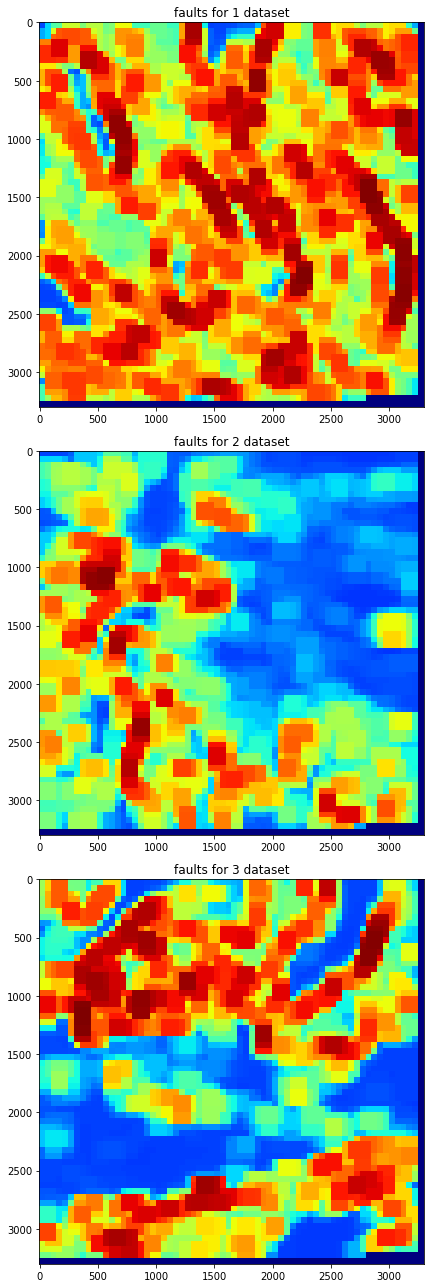

In [38]:
f, ax = plt.subplots(3, 1, figsize=(9, 18))
for i in range(3):
    ax[i].imshow(Image.open("scripts/predictions_for_train_datasets_12_2class/heatmaps_3class_faults_{}.tif".format(i)))
    ax[i].set_title("faults for {} dataset".format(i+1))
plt.tight_layout()

The results seem reasonable, further we will use this approach

## Classification with 3 convolutional layers

Previous results were obtained with 2 convolutional layers, now we increase it by one and therefore we multiply the number of training iterations by 4. 

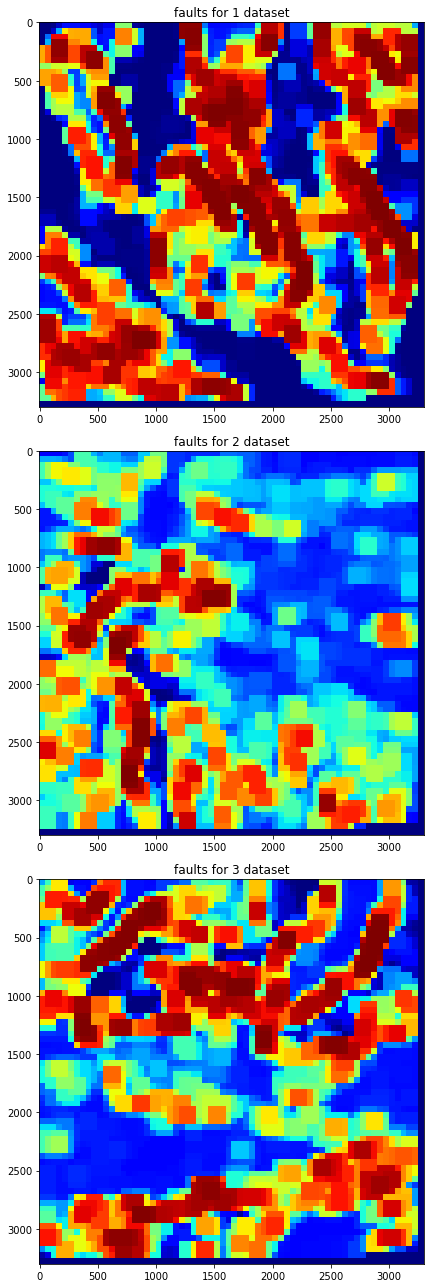

In [40]:
f, ax = plt.subplots(3, 1, figsize=(9, 18))
for i in range(3):
    ax[i].imshow(Image.open("scripts/predictions_for2class_3layercnn_longer_training/heatmaps_3class_faults_{}.tif".format(i)))
    ax[i].set_title("faults for {} dataset".format(i+1))
plt.tight_layout()

## check each feature

We are using 5-band images as input for nn (normalised optical-r, optical-g, optical-b, elevation, slope). Now we'll check predictive performance of each feature. The number of layers were reduced to 2. 

### optical (r, g, b stacked)

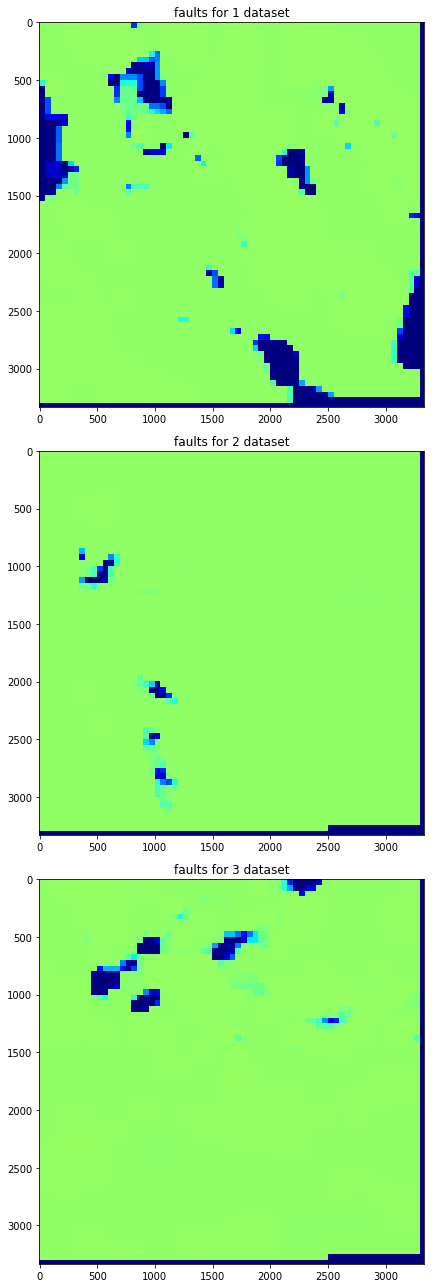

In [43]:
f, ax = plt.subplots(3, 1, figsize=(9, 18))
for i in range(3):
    ax[i].imshow(Image.open("scripts/optical_channels_datasets_12/heatmaps_faults_{}.tif".format(i)))
    ax[i].set_title("faults for {} dataset".format(i+1))
plt.tight_layout()

### elevation

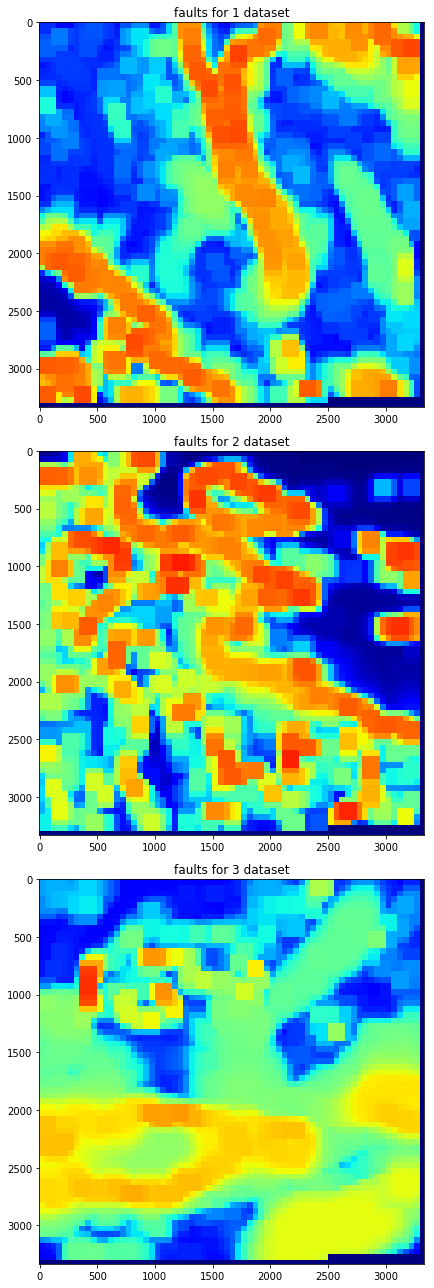

In [46]:
f, ax = plt.subplots(3, 1, figsize=(9, 18))
for i in range(3):
    ax[i].imshow(Image.open("scripts/elevation_dataset_12/heatmaps_faults_{}.tif".format(i)))
    ax[i].set_title("faults for {} dataset".format(i+1))
plt.tight_layout()

### slope

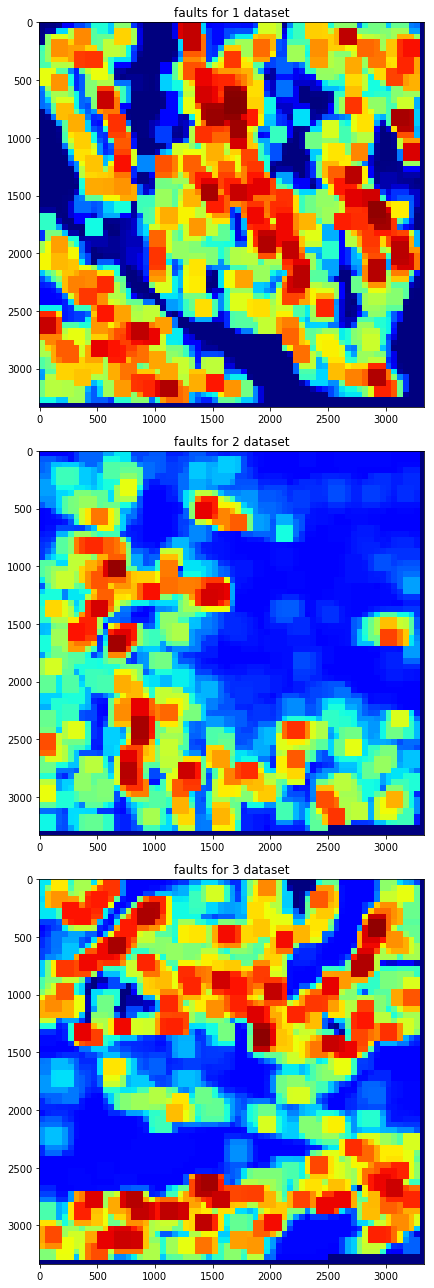

In [47]:
f, ax = plt.subplots(3, 1, figsize=(9, 18))
for i in range(3):
    ax[i].imshow(Image.open("scripts/slope_dataset_12/heatmaps_faults_{}.tif".format(i)))
    ax[i].set_title("faults for {} dataset".format(i+1))
plt.tight_layout()

## Comparison of min and max for visualisation

Here we compare different statistics for the prediction of pixel value based on all patches with it. Max was used before, here mean

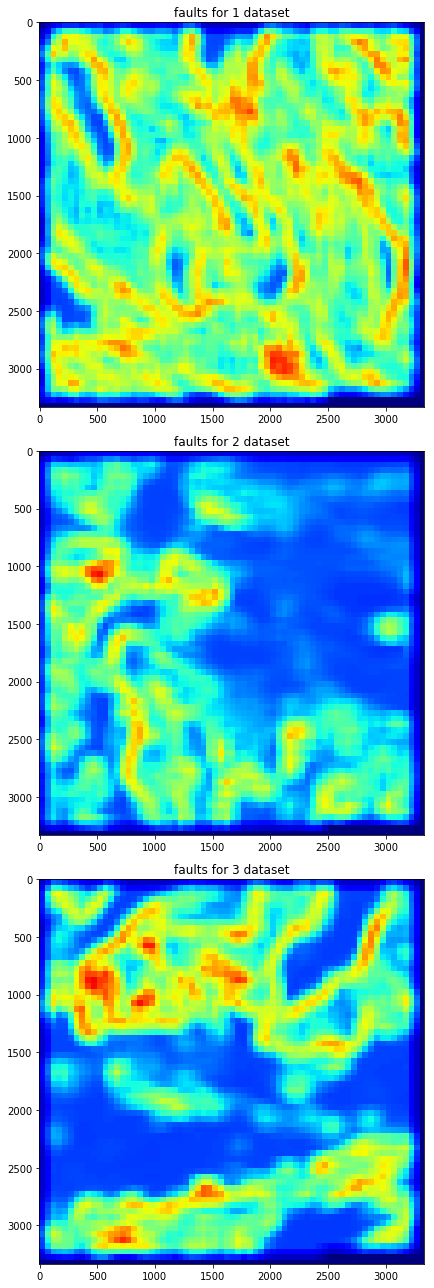

In [3]:
f, ax = plt.subplots(3, 1, figsize=(9, 18))
for i in range(3):
    ax[i].imshow(Image.open("scripts/predictions_for_train_datasets_12_2class_mean/heatmaps_faults_{}.tif".format(i)))
    ax[i].set_title("faults for {} dataset".format(i+1))
plt.tight_layout()

## Finer resolution for mean

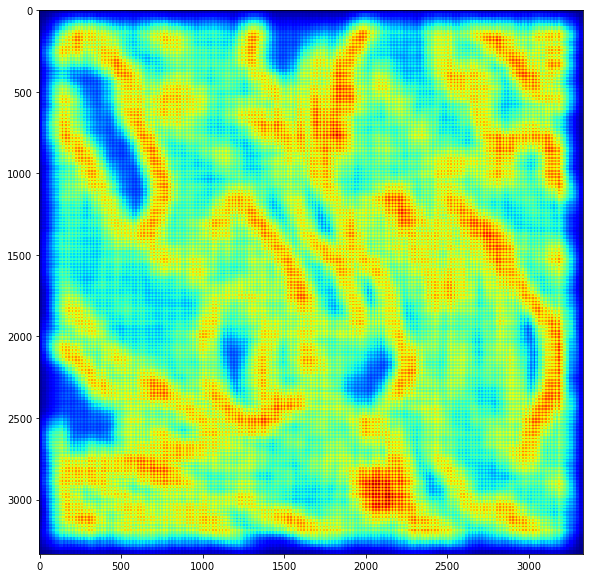

In [7]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(Image.open("scripts/heatmaps_faults_0.tif"))